Generate Plot

In [43]:
import matplotlib.pyplot as plt
import numpy as np

batch_size = 1
stride_size = 1

input_height = input_width = 16
input_channels = 3

filter_height = filter_width = 3

output_height = output_width = int((input_height - filter_height + stride_size) / stride_size)
output_channels = filter_channels = 8

print(input_height, input_width, input_channels)
print(filter_height, filter_width, filter_channels)
print(output_height, output_width)

16 16 3
3 3 8
14 14


Plot Input feature map accesses

In [53]:
time = 0
input_accesses = np.zeros((input_height, input_width, filter_channels))
# print(input_accesses)
accesses = []
times = []


for n in range(batch_size):
    for p in range(output_height):
        for q in range(output_width):
            for m in range(filter_channels):
                for r in range(filter_height):
                    input_x = stride_size * p + r
                    for s in range(filter_width):
                        input_y = stride_size * q + s
                        for c in range(input_channels):
                            # input_accesses[input_x][input_y][c] += 1
                            accesses.append(input_x * input_channels * input_width + input_y * input_channels + c)
                            times.append(time)
                            time += 1

# print(time)

42336


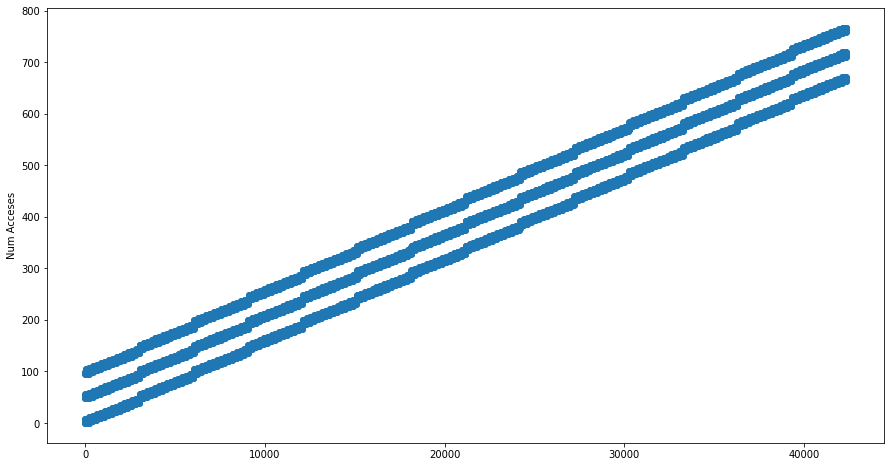

In [54]:
print(time)

plt.figure(figsize=[15, 8])
plt.ylabel('Num Acceses')
plt.xlabel('')

plt.scatter(times, accesses)
plt.show()

Plot output feature map acceses

In [51]:
time = 0
# output_accesses = np.zeros((input_height, input_width, filter_channels))
# print(input_accesses)
accesses = []
times = []


for n in range(batch_size):
    for p in range(output_height):
        for q in range(output_width):
            for m in range(filter_channels):
                for r in range(filter_height):
                    input_x = stride_size * p + r
                    for s in range(filter_width):
                        input_y = stride_size * q + s
                        for c in range(input_channels):
                            # output_accesses[p][q][m] += 1
                            accesses.append(p * filter_channels * output_width + q * filter_channels + m)
                            times.append(time)
                            time += 1

                accesses.append(p * filter_channels * output_width + q * filter_channels + m)
                times.append(time)
                time += 1

# print(time)

114464


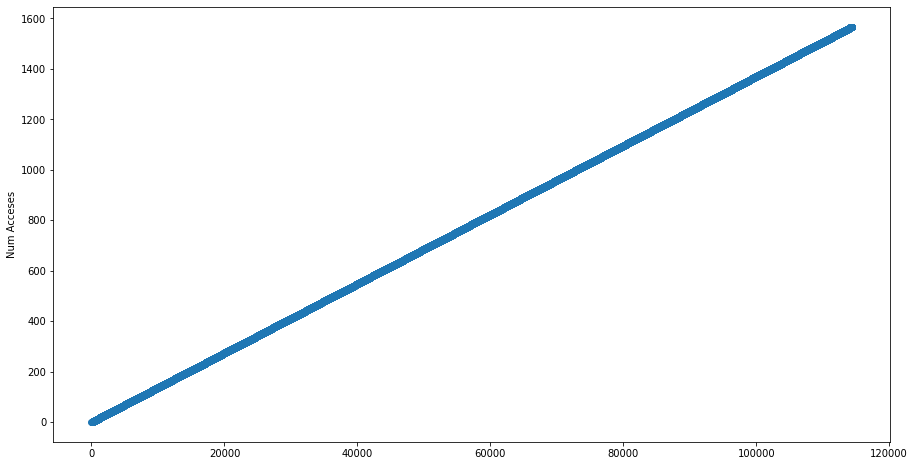

In [52]:
print(time)

plt.figure(figsize=[15, 8])
plt.ylabel('Num Acceses')
plt.xlabel('')

plt.scatter(times, accesses)
plt.show()

Plot weight feature map accesses